Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Processing

In [2]:
#loading dataset
loan_df = pd.read_csv('loan.csv')

In [3]:
type(loan_df)

pandas.core.frame.DataFrame

In [4]:
#Looking at sample of the data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns
loan_df.shape

(614, 13)

In [7]:
# Overview of the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Statistical measures for our data
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# dealing with nan or null values
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# filling in null values for numeric data
from sklearn.impute import SimpleImputer

loan_mean_num = SimpleImputer(strategy = 'median')
loan_mean_num.fit(loan_df[['LoanAmount','Loan_Amount_Term']])

loan_df[['LoanAmount','Loan_Amount_Term']] = loan_mean_num.transform(loan_df[['LoanAmount','Loan_Amount_Term']])

In [14]:
#filling null values in categorical data
loan_cat = SimpleImputer(strategy = 'most_frequent')
loan_cat.fit(loan_df[['Gender','Married','Dependents','Self_Employed','Credit_History']])

loan_df[['Gender','Married','Dependents','Self_Employed',
                     'Credit_History']] = loan_cat.transform(loan_df[['Gender','Married','Dependents','Self_Employed',
                     'Credit_History']])

In [16]:
# Checking that the null values has been filled
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# replacing the loan status with 1 or 0
loan_df.replace({'Loan_Status':{'N':0, 'Y':1}},inplace = True)

In [22]:
# checking our data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [26]:
# checking the dependent values
loan_df['Dependents'].value_counts()

# We see that we get a 3+ which cannot be feed into our model

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
# replacing the value of 3+ to 4
loan_df = loan_df.replace(to_replace= '3+', value = 4)

In [29]:
#dependent values
loan_df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

Visualising Data

<AxesSubplot:xlabel='Education', ylabel='count'>

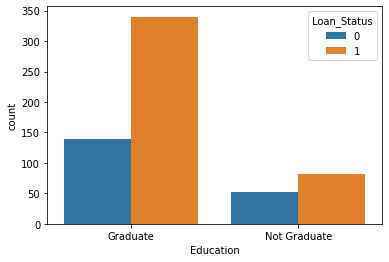

In [31]:
# education to loan status
sns.countplot(x='Education', hue = 'Loan_Status', data =loan_df)

We see the likelihood of a loan being approved for a graduate is slightly higher than that of the undergranduate

<AxesSubplot:xlabel='Married', ylabel='count'>

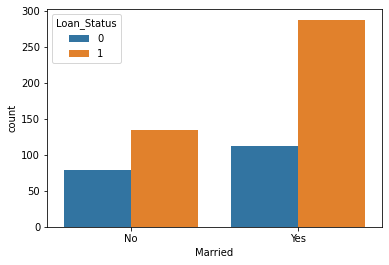

In [32]:
# marital status to loan status
sns.countplot(x ='Married', hue = 'Loan_Status', data = loan_df)

we see that loans are approved mostly for married people

<AxesSubplot:xlabel='Gender', ylabel='count'>

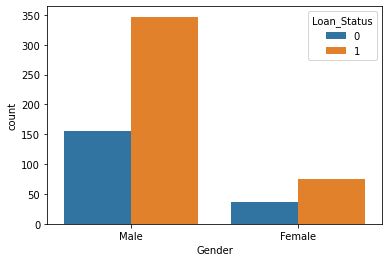

In [33]:
# checking the loanstatus to gender
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_df)

Here we see the bank or government is a misogynist as there is a huge disparity between approval for both genders...Lol, i joke.

In [49]:
# converting categorical data
loan_df.replace({'Married': {'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace = True)

In [50]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [51]:
# separating the data and label
x = loan_df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = loan_df['Loan_Status']

In [52]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [53]:
#splitting data into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, stratify = y, random_state = 42)

In [54]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (460, 11) (154, 11)


In [55]:
#Using SVM to train model
classifier = svm.SVC(kernel ='linear')

In [56]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [58]:
# accuracy score of training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy =  accuracy_score(x_train_prediction,y_train)

In [61]:
print('Accuracy on training model: ',training_data_accuracy)

Accuracy on training model:  0.7782608695652173


In [62]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy =  accuracy_score(x_test_prediction,y_test)

In [63]:
print('Accuracy on test model: ',test_data_accuracy)

Accuracy on test model:  0.8376623376623377
